Compared to the 1 Dimensional Burgers' equation, the 2D version is a bit more involved. The one-dimensional version is as follows:

$$\frac{\delta u}{\delta t} + u \frac{\delta u}{\delta x} = v \frac{\delta ^2 u}{\delta x^2}$$

And the two-dimensional version has 2 PDEs, as we must calculate the updated velocity in the x and y direction. In this case, the viscosity is represented as the letter eta ($\eta$). The equations are shown below:

$$\frac{\delta u}{\delta t} + u \frac{\delta u}{\delta x} + v \frac{\delta u}{\delta y} = \eta (\frac{\delta ^2 u}{\delta x^2} \frac{\delta ^2 u}{\delta y^2})$$

And 

$$\frac{\delta v}{\delta t} + u \frac{\delta v}{\delta x} + v \frac{\delta v}{\delta y} = \eta (\frac{\delta ^2 v}{\delta x^2} \frac{\delta ^2 v}{\delta y^2})$$


These equations can be discretised and solved:

$$u_{i,j}^{n+1} = u_{i,j}^n - u_{i,j}^n \frac{\Delta t}{\Delta x}(u_{i,j}^n - u_{i-1,j}^n) + \eta \frac{\Delta t}{\Delta x^2}(u_{i+1,j}^n - 2u_{i,j}^n + u_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y}(u_{i,j}^n - u_{i,j-1}^n) + \eta \frac{\Delta t}{\Delta y^2}(u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n)$$

$$v_{i,j}^{n+1} = v_{i,j}^n - u_{i,j}^n \frac{\Delta t}{\Delta x}(v_{i,j}^n - v_{i-1,j}^n) + \eta \frac{\Delta t}{\Delta x^2}(v_{i+1,j}^n - 2v_{i,j}^n + v_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y}(v_{i,j}^n - v_{i,j-1}^n) + \eta \frac{\Delta t}{\Delta y^2}(v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j-1}^n)$$

As for the previous few steps, the same initial and boundary conditions are used

In [1]:
#Importing packages

#Plotting library that is new to me
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
#Declare parameter variables

nx = 41 #Number of x points
ny = 41 #Number of y points
steps = 120 #Number of time steps to simulate
dx = 2 / (nx - 1) #Difference in x between x points
dy = 2 / (ny - 1) #Difference in y between y points
sigma = 0.0009 #Not sure yet - defines the time step
dt = sigma * dx #Difference in time between time steps
vis = 0.01

#Create grid
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

#Holds current grid conditions in a matrix
u = np.ones((ny, nx))
v = np.ones((ny, nx))

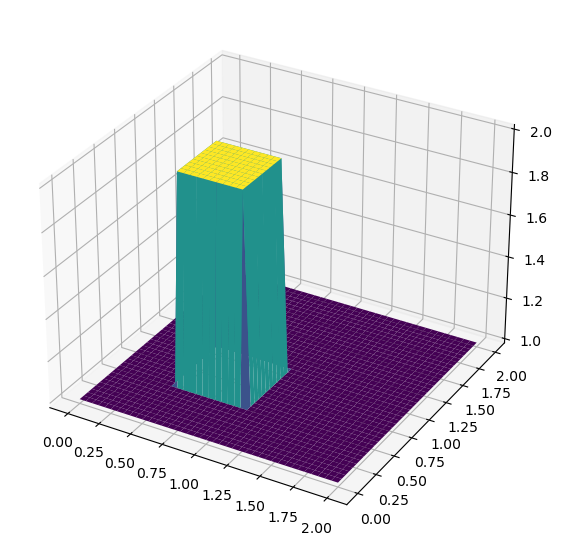

In [3]:
#Initial conditions

u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 

#Display intial condition
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

In [4]:
#Update code
def update(u, v, dt, dx, dy, vis):
    unext = u.copy()
    vnext = v.copy()
    
    #Update with update rule and numpy matrix operations
    unext[1:-1, 1:-1] = (u[1:-1, 1:-1] -
                     dt / dx * u[1:-1, 1:-1] * 
                     (u[1:-1, 1:-1] - u[1:-1, 0:-2]) - 
                     dt / dy * v[1:-1, 1:-1] * 
                     (u[1:-1, 1:-1] - u[0:-2, 1:-1]) + 
                     vis * dt / dx**2 * 
                     (u[1:-1,2:] - 2 * u[1:-1, 1:-1] + u[1:-1, 0:-2]) + 
                     vis * dt / dy**2 * 
                     (u[2:, 1:-1] - 2 * u[1:-1, 1:-1] + u[0:-2, 1:-1]))
    
    
    vnext[1:-1, 1:-1] = (v[1:-1, 1:-1] - 
                     dt / dx * u[1:-1, 1:-1] *
                     (v[1:-1, 1:-1] - v[1:-1, 0:-2]) -
                     dt / dy * v[1:-1, 1:-1] * 
                    (v[1:-1, 1:-1] - v[0:-2, 1:-1]) + 
                     vis * dt / dx**2 * 
                     (v[1:-1, 2:] - 2 * v[1:-1, 1:-1] + v[1:-1, 0:-2]) +
                     vis * dt / dy**2 *
                     (v[2:, 1:-1] - 2 * v[1:-1, 1:-1] + v[0:-2, 1:-1])) 
    
    
    #Specify boundary conditions
    
    unext[0,:] = 1
    unext[-1,:] = 1
    unext[:,0] = 1
    unext[:,-1] = 1
    
    vnext[0,:] = 1
    vnext[-1,:] = 1
    vnext[:,0] = 1
    vnext[:,-1] = 1
    
    return unext, vnext

In [5]:
#Initialising function
def initialise(nx, ny, dy, dx):
    u = np.ones((nx, ny))
    v = np.ones((nx,ny))
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
    v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 

    
    return u, v

In [6]:
def Burgers(steps, vis=vis, dt=dt, dx=dx, dy=dy, nx=nx, ny=ny):
    
    #Initialise
    u,v = initialise(nx,ny,dy,dx)
    
    #Update
    for i in range(steps):
        u,v = update(u, v, dt, dx, dy, vis)
        
    #Display
    fig = plt.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')                      
    X, Y = np.meshgrid(x, y)                            
    surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

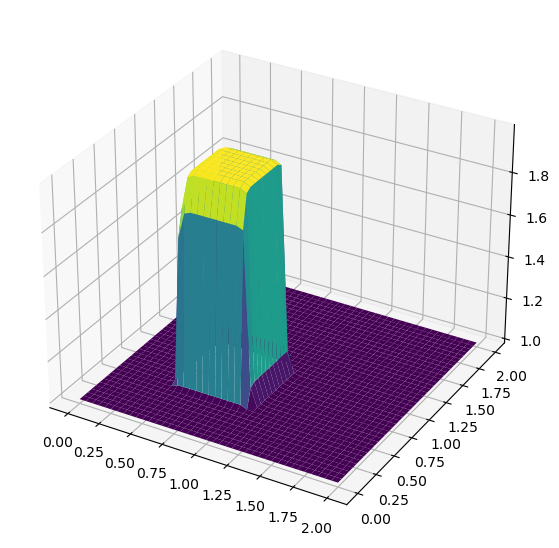

In [7]:
Burgers(100)

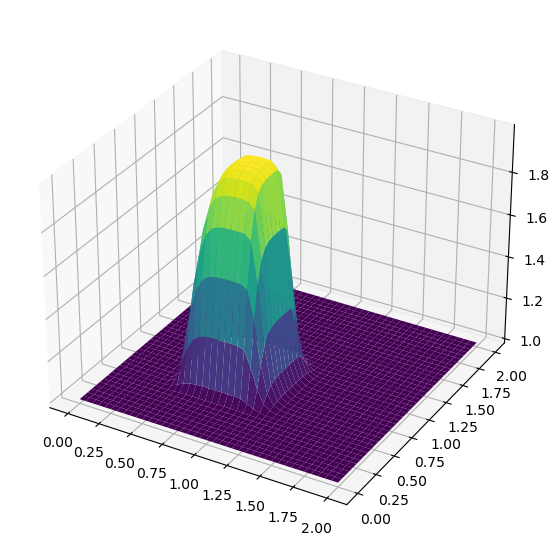

In [8]:
Burgers(1000)

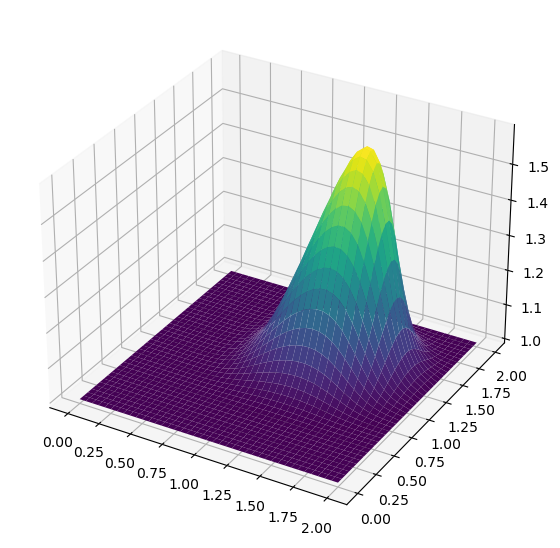

In [9]:
Burgers(10000)